<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 3: Large Margin Classifiers</H2>

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
| 26th February 2019  | **  Monday 4th March ** |


This workshop is worth 30% of the total module mark.

Student number: <b> 660022200 </b>



Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>


<div class="alert alert-info">
Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
</div>


# Large margin classifiers and support vector machines

The aim of this workshop is to write and test code for a nonlinear support vector machine.  It builds on and repeats some of the last workshop and is done in stages:

1. You will do a couple of exercises to familiarise yourself with constrained optimisation and the Lagrangian dual formulation.
1. Initially, you will write a linear large margin classifier for linearly separable data.
1. The next stage is to modify this code, which uses a *hard margin* to a soft margin.
1.  Finally, you will use the *kernel trick* to map the data to a high-dimensional feature space, while calculating the necessary inner-products in the original data space.

At each stage, you should test your code on the provided data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1. Constrained optimisation with equality constraints

To begin with we will solve an optimisation problem with equality constraints.  The problem is defined for a two-dimensional $\mathbf{x} = (x_1, x_2)^T$ as follows:
\begin{align*}
    \mbox{min}_\mathbf{x} ~~ f(\mathbf{x}) &= x_1^2+ 3x_2^2\\
    \text{such that}\qquad & x_1 + x_2 = 1
\end{align*}

In this part, you will be asked to solve the problem "by hand", using markdown cells to explain your steps. 

To see what is going on, make a contour plot of $f(\mathbf{x})$ and draw the contraint line on it.  The following code will draw the contour.  You should add the constraint line. 

You should be able to approximately read the value and location of the contrained minimum from your plot.

(-1.0, 2.0, -1.0, 2.0)

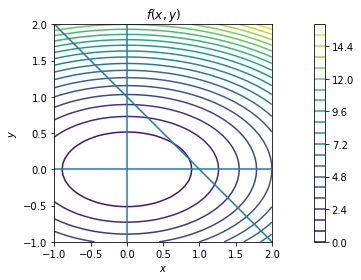

In [4]:
def f(x, y):
    """Evaluate the unconstrained objective function"""
    return x*x + 3*y*y

x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
#plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 24)
plt.colorbar()
plt.plot(x,1-x)
plt.axis('scaled')

<b>1.1)</b>
Write the contraint in standard form $h(\mathbf{x}) = 0$ and therefore write down the Lagrangian, $L(\mathbf{x}, \nu)$.  You could do this and the following cells on a piece of paper, but it's not too hard to put it into LaTeX for posterity.
<div style="text-align: right"><b>[4 marks]</b></div>

My constraint in standard form is:
$$h(\mathbf{x}) = 1 - x_1 - x_2$$

The Lagrangian:
$$L(\mathbf{x},\nu) = x_1^2 + 3x_2^2 + \nu (1 - x_1 - x_2)$$

<b>1.2)</b>
First, minimise the unconstrained minimisation problem by minimising $L(\mathbf{x}, \nu)$ with respect to $\mathbf{x}$ and $\nu$.  This is done by setting the partial derivatives with respect to $x_1$, $x_2$ and $\nu$ to zero and solving for $x_1$, $x_2$ and $\nu$.
<div style="text-align: right"><b>[5 marks]</b></div>


Working out the partials:
$$\frac{\partial \mathbf{L}}{\partial x_1} = 2x_1 - \nu$$

$$\frac{\partial \mathbf{L}}{\partial x_2} = 6x_2 - \nu$$

$$\frac{\partial \mathbf{L}}{\partial \nu} = 1 - x_1 - x_2$$

Setting these equal to zero to solve the minimisation problem, we retrieve the following simultaneous equations:
$$x_1 + x_2 = 1$$

$$\nu = 2x_1$$

$$\nu = 6x_2$$

Finally solving for $\nu$, $x_1$, and $x_2$:
$$\nu = \frac{3}{2}$$

$$x_1 = \frac{3}{4}$$

$$x_2 = \frac{1}{4}$$


<b>1.3)</b> 
Plot the minimising point on your contour plot and verify that agrees with  the constraint and the function value at the constrained minimum.
<div style="text-align: right"><b>[2 marks]</b></div>

$$h(\mathbf{x}) = 1 - x_1 - x_2 = 1 - (\frac{3}{4}) - (\frac{1}{4}) = 0$$

$$f(\mathbf{x}) = x_1^2 + 3x_2^2 = (\frac{3}{4})^2 + 3(\frac{1}{4})^2 = \frac{3}{4}$$

<b> *Verified in graph plotted in graph below where the point is on the line that is tangent to the ellipse* </b>

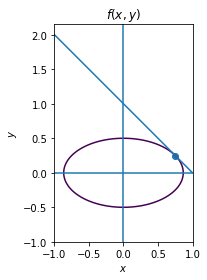

In [5]:
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + 3*Y**2 - 3/4
plt.contour(X,Y,F,[0])
ox1 = 3/4
ox2 = 1/4
plt.plot(x,1-x)
plt.axis('scaled')
plt.scatter(3/4,1/4) #1.3

<b>1.4)</b>
Now we will solve the problem again, but this time by finding the Lagrangian dual function, which we will maximise to find the optimal dual variable $\nu$ and thus the optimal $\mathbf{x}$.

By setting the derivative of the Largrangian with respect to $\mathbf{x}$ to zero, find the Largrangian dual function $g(\nu)$. 
<div style="text-align: right"><b>[5 marks]</b></div>

The Lagrangian dual function formula is:
$$ g(\nu) = min[f(\mathbf{x}) + \nu h(\mathbf{x})]$$

We substitute in 2 of our simultaneous equations from earlier that minimise L based on $x_1$ and $x_2$:
$$\nu = 2x_1$$
$$\nu = 6x_2$$

$$ g(\nu) = x_1^2 + 3x_2^2 + \nu(1 - x_1 - x_2) = ((\frac{\nu}{2})^2 + 3(\frac{\nu}{6})^2 + \nu(1 - (\frac{\nu}{2}) - (\frac{\nu}{6}))) $$

$$ g(\nu) = \nu - \frac{\nu^2}{3}$$


<b>1.5)</b>
Maximise $g(\nu)$ with respect to $\nu$ and so find the optimal dual variable $\nu^\star$ and thus $g(\nu^\star)$.
<div style="text-align: right"><b>[5 marks]</b></div>

We maximise $g(\nu)$ by equalling $\frac{\partial g}{\partial \nu}$ to $0$ as to find the optimal dual variable $\nu^*$. 

$$\frac{\partial g}{\partial \nu} = 1 - \frac{2\nu}{3} = 0$$

$$\nu^* = \frac{3}{2}$$

Substituting back in:

$$ g(\nu^*) = \nu - \frac{\nu^2}{3} = (\frac{3}{2}) - \frac{1}{3} (\frac{3}{2})^2 = \frac{3}{4}$$ 


<b>1.6)</b>
Use the relations you derived when finding the Lagrangian dual function to get $\mathbf{x}^\star$ from $\nu^\star$.  Thus find $f(\mathbf{x}^\star)$ and verify that it equals $g(\nu^\star)$.

<div style="text-align: right"><b>[4 marks]</b></div>

We find $\mathbf{x^*}$ by using our relations and $\nu^*$ derived earlier:
$$x_1 = \frac{1}{2}(\frac{3}{2}) = \frac{3}{4}$$

$$x_2 = \frac{1}{6}(\frac{3}{2}) = \frac{1}{4}$$

$$\mathbf{x}^* = [x_1,x_2] = [\frac{3}{4},\frac{1}{4}]$$

We now find $f(\mathbf{x}^*)$ in order to verify it agrees with $g(\nu^*)$ found earlier:

$$f(\mathbf{x}^*) = x_1^2 + 3x_2^2 = (\frac{3}{4})^2 + 3(\frac{1}{4})^2 = \frac{3}{4}$$

## Part 2. Quadratic programming

At the heart of the dual formulation of the large margin classifier (LMC) is the quadratic programme with constraints.  For example, for the hard LMC the dual Lagrange function to be *maximised* is:
\begin{align*}
          \newcommand{\balpha}{\mathbf{\alpha}}
          \newcommand{\bx}{\mathbf{x}}
        \max_{\balpha} & ~~ \sum_n \alpha_n - \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{such that   }\quad & \alpha_n \ge 0, \quad \sum_n \alpha_n t_n = 0
\end{align*}
      
There are a number of quadratic progamming functions that you could use, but I recommend that you use those from [cvxopt](http://cvxopt.org/).  On the workshop machines you should be able to import the module with:

    import cvxopt
    
If you want to use `cvxopt` on your own machine then you can install it from a shell with `conda`

    conda install cvxopt

## `cvxopt` example

Here is an example of solving a constrained quadratic program (QP) with `cvxopt`. This is largely copied from https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf

The standard form for a QP in `cvxopt` notation is:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^T P x &+ q^T x \\
        \text{such that   }\quad  Gx &\preceq h\\
        Ax & = b
\end{align*}
where $Gx \preceq h$ means that the inequality is taken element-wise for each row of $Gx$ and $h$.

In `cvxopt` the QP is defined by the parameters $P, q, G, h, A$ and $b$.  The matrix $P$ and the vector $q$ must be specified, but the others are optional.   Note that all optimisations must be manipulated to be of this form.  In particular, note that you will want to *maximise* the Lagrangian dual $g(\mathbf{\alpha})$, so you will have to write the maximisation as the minimisation of $-g(\mathbf{\alpha})$.

Here is a simple example:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^2 + & 3x + 4y\\
        \text{such that   }\quad x, y & \ge 0\\
        x + 3y & \ge 15\\
        2x + 5y & \le 100\\
        3x + 4y & \le 80
\end{align*}


Evaluate the objective function on a grid covering the range $[-5, 20] \times [-5, 20]$ and so plot contours of the objective function.  Augment your plot with lines showing the inequalities and so, by eye, find the minimum of the objective function. 

(If you want to be fancy -- not necessary -- you could use the [fillplots](https://github.com/tkf/fillplots) module to plot the region defined by the inequalities.

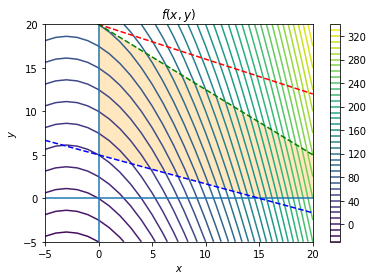

In [6]:
def o(x, y):
    """Evaluate the unconstrained objective function"""
    return (1/2)*x*x + 3*x + 4*y

def eq1(x):
    return (15 - x)/3
def eq2(x):
    return (100-2*x)/5
def eq3(x):
    return (80-3*x)/4

x1 = 0
x2 = 0
x3 = 15
x4 = 20
x5 = 20
y1 = 20
y2 = 5
y3 = 0
y4 = 0
y5 = 5

plt.fill([x1,x2,x3,x4,x5,x1],[y1,y2,y3,y4,y5,y1],'orange',alpha=0.25)

x = np.linspace(-5, 20, 26)
y = np.linspace(-5, 20, 26)
X, Y = np.meshgrid(x, y)
F = o(X, Y)
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
plt.contour(X, Y, F, 39)
plt.plot(x,eq1(x),'b--',x,eq2(x),'r--',x,eq3(x),'g--')
plt.ylim((-5,20))
plt.colorbar()

The inequalities are the dashed lines and the solid blue lines at x,y = 0. 

The minimum occurs where the smallest contour(most inner contour) touches the blue dashed line at roughly x = 0 and roughly y = 5 via observation of the graph plotted above. This is because the feasible region(in orange) is below or on the red and green dashed lines and above or on the blue dashed line whilst x,y >= 0 holds true.

The problem can be written in standard form as:

\begin{align*}
  \min_{x, y} \tfrac{1}{2}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}^T
  \begin{bmatrix}
    1 & 0\\
    0 & 0
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}
  +
   \begin{bmatrix}
    3 \\ 4
  \end{bmatrix}^T
 \begin{bmatrix}
    x \\ y
  \end{bmatrix}\\
  \begin{bmatrix}
    -1 & 0\\
    0 & -1\\
    -1 & -3\\
    2 & 5\\
    3 & 4
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}  
  \preceq
  \begin{bmatrix}
    0 \\ 0 \\ -15 \\ 100 \\ 80
  \end{bmatrix}
\end{align*}

Note that all the inequality constraints have been gathered into the matrix $G$ and that since there are no equality constraints $A$ and $b$ do not need to be specified.  Note
that even though $y^2$ did not appear in the original objective, we had to include it with zero coefficients in P because the solver parameters must be defined using the full set of variables.  Even if certain variables only appear in constraints, they will still need to be expressed with zero coefficients in the objective parameters, and *vice versa*.

<div style="text-align: right"><b>[5 marks]</b></div>

Matrices specifying the QP to  `cxvopt` are defined using the `cvxopt` matrices.  Since you will be using `numpy` arrays to store the data for your LMC and SVM, we will define the `cvxopt` matrices via `numpy` arrays as follows.  

In [7]:
from cvxopt import matrix

In [8]:
P = matrix(np.diag([1,0]), tc='d') 
q = matrix(np.array([3,4]), tc='d')
G = matrix(np.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(np.array([0,0,-15,100,80]), tc='d')

The `tc='d'` argument ensures that the matrices are floating point numbers rather than integers (`tc` stands for "typecode").

Now, at last, we can solve the QP:

In [9]:
from cvxopt import solvers
sol = solvers.qp(P, q, G, h)

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  4e-17  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  8e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  8e-17  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  7e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  9e-17  4e-16
 6:  2.0062e+01  1.9974e+01  9e-02  7e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  8e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  2e-16
Optimal solution found.


If there were equality constraints (and don't forget that you will have an equality constraint!) you would get the solution with 

    sol = solvers.qp(P, q, G, h, A, b)

Information about the solution can be found from the `sol` dictionary

In [10]:
print('The solution is\n', sol['x'])
print('The objective is', sol['primal objective'])

The solution is
 [ 7.13e-07]
[ 5.00e+00]

The objective is 20.00000617311241


More information from the various key-value pairs in the dictionary.  See the [`cxvopt` documentation](http://cvxopt.org/userguide/index.html) for more information on what these mean.

In [11]:
for k, v in sol.items():
    print(k, v)

x [ 7.13e-07]
[ 5.00e+00]

y 
s [ 7.13e-07]
[ 5.00e+00]
[ 3.74e-06]
[ 7.50e+01]
[ 6.00e+01]

z [ 1.67e+00]
[ 2.35e-08]
[ 1.33e+00]
[ 1.51e-08]
[ 2.28e-08]

status optimal
gap 8.788553731701274e-06
relative gap 4.3942774404993765e-07
primal objective 20.00000617311241
dual objective 19.99999738455868
primal infeasibility 1.1710307819972547e-16
dual infeasibility 1.9860273225978186e-16
primal slack 7.131816408857108e-07
dual slack 1.50695110360481e-08
iterations 8


Check that the solution you've found agrees with your plot!   You should now be equipped to solve constrained quadratic optimisation problems.
<div style="text-align: right"><b>[5 marks]</b></div>

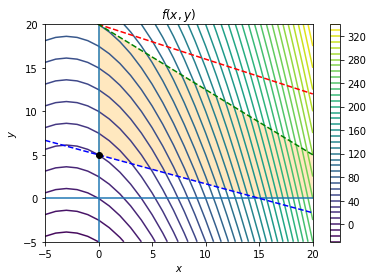

In [12]:
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
plt.contour(X, Y, F, 39)
plt.fill([x1,x2,x3,x4,x5,x1],[y1,y2,y3,y4,y5,y1],'orange',alpha=0.25)
plt.plot(x,eq1(x),'b--',x,eq2(x),'r--',x,eq3(x),'g--')
plt.ylim((-5,20))
plt.colorbar()
plt.plot(sol['x'][0],sol['x'][1],'ko')

Plotting the point the solver retrieves, we can verify it is the same point we were referring to previously and satisfies all inequalities.

# Part 3. Hard, large margin classifier

Given a linearly separable training data set `X` and `t`, write a function 

    sv, score = lmc(X, t, Xtest)

to construct a large margin classifier for the data and to classify the data in `Xtest`. 

Your function should construct and solve the Lagrangian dual function for a vector of $\alpha$s.  The the non-zero $\alpha$ correspond the support vectors and your function should return a vector, `sv` of indices of the support vectors in `X` (or a Boolean array indicating the SVs).   Your function should also return a vector, `score`, of the signed distances of each `Xtest` from the optimal hyperplane. The signed distance is the distance from the hyperplane, with the sign specifying which side of the hyperplane the point is on.  It is easily calculated from $\mathbf{w}^T \mathbf{x} + b$.  

Note when classifying an observation $\mathbf{x}$ it is best not to calculate the coefficients $\mathbf{w}$ in order to calculate the discriminant function $\mathbf{w}^T \mathbf{x} + b$.  This is because later, when we use a kernel to map to higher dimensional spaces, $\mathbf{w}$ may be very high dimensional (possibly infinite dimensional).  Instead calculate the discriminant function from the $\mathbf{x}_n, t_n$ and $\alpha_n$.

<div style="text-align: right"><b>[10 marks]</b></div>

In [39]:
def lmc(X, t, Xtest):
    
    #PROBLEM FORMULATION AND SOLVER
    N = len(X[:,0])
    P = matrix(np.outer(t,t)*np.inner(X,X)) #letting alpha be x in the cvxopt formula and formulating the minimisation
    q = matrix(-1*np.ones(N))
    G = matrix(np.diag(-1*np.ones(N))) #accounts for a >= 0
    h = matrix(np.zeros(N))
    A = matrix(t, (1,N)) #sum of all a*t = 0
    b = matrix(0.0)

    solution = solvers.qp(P, q, G, h, A, b)
    alpha = solution['x']
    alphav = np.array(alpha)
    
    r = np.where(alphav > 1e-4) #indices of support vectors
    sva = alphav[r[0]] #alphas of support vectors
    sv = X[r[0],:]  #support vector coordinates
    tsv = t[r[0]]   #support vector targets
    numsvs = len(sv)
    W = np.zeros((1,len(X[0,:])))
    Y = np.zeros((1,len(Xtest[:,0])))
    
    # FINDING W(used in plotting)
    for i in np.arange(numsvs):
        W = W + sva[i]*tsv[i]*sv[i,:]
    
    # FINDING B(BIAS)
    Bias = 0
    for i in np.arange(numsvs):
        Bias = Bias + tsv[i] - sum(sva[i]*tsv[i]*np.inner(sv[i],sv))
        
    Bias = Bias/numsvs
    
    # FINDING SCORES(Distance from Hyperplane) OF TEST DATA
    for j in np.arange(len(Xtest[:,0])):
        Y[:,j] = Bias
        for i in np.arange(numsvs):
            Y[:,j] = Y[:,j] + sum(sva[i]*tsv[i]*np.inner(sv[i],Xtest[j]))
    
    # PLOTTING COMMANDS
    Xdel = np.delete(X ,r[0],axis = 0)
    tdel = np.delete(t ,r[0],axis = 0)
    plt.plot(Xdel[tdel==-1,0], Xdel[tdel==-1,1], 'bo')
    plt.plot(Xdel[tdel==1,0], Xdel[tdel==1,1], 'ro')
    plt.scatter(sv[tsv==-1,0], sv[tsv==-1,1], s=80, facecolors='none', edgecolors='b')
    plt.scatter(sv[tsv==1,0], sv[tsv==1,1], s=80, facecolors='none', edgecolors='r')
    W = W[0]
    xrange = np.linspace(-3, 6, 50)
    def eq(m,w1,w2,x,b):
        return (m-b-w1*x)/w2    
    
    plt.plot(xrange,eq(0,W[0],W[1],xrange,Bias),'k-',linewidth = 1)
    plt.plot(xrange,eq(1,W[0],W[1],xrange,Bias),'k--',linewidth = 1)
    plt.plot(xrange,eq(-1,W[0],W[1],xrange,Bias),'k--',linewidth = 1)
    
    
    return r[0], Y


Test your code on the following two-dimensional separable data.  Plot the data, the separating hyperplane and its margins, together with the support vectors.
<div style="text-align: right"><b>[5 marks]</b></div>

     pcost       dcost       gap    pres   dres
 0: -1.3514e+01 -2.6193e+01  3e+02  2e+01  2e+00
 1: -2.1307e+01 -1.6024e+01  1e+02  6e+00  7e-01
 2: -1.7104e+01 -5.5275e+00  3e+01  2e+00  2e-01
 3: -2.6229e+00 -2.2917e+00  4e+00  2e-01  2e-02
 4: -1.9747e+00 -2.0525e+00  4e-01  1e-02  1e-03
 5: -2.0065e+00 -2.0411e+00  4e-02  2e-04  2e-05
 6: -2.0381e+00 -2.0385e+00  4e-04  2e-06  2e-07
 7: -2.0384e+00 -2.0384e+00  4e-06  2e-08  2e-09
 8: -2.0384e+00 -2.0384e+00  4e-08  2e-10  2e-11
Optimal solution found.
The Support Vector indices are [51 58 73]
The displacements of the test data points from the optimal hyperplane: [[ 1.30977825  4.42124597  2.06469658 -6.65322836 -3.33841113 -3.10408755
  -4.75830089  1.89064434 -5.98220121 -2.1049067  -6.60621769 -6.20358542
   3.94048259 -1.27749626  4.87549964 -4.60020952  7.54035387  2.06194402
  -6.19423047 -3.88568857]]


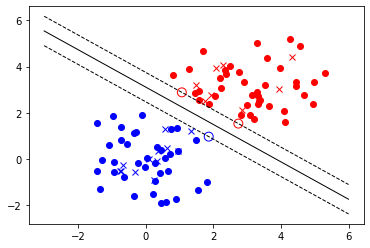

In [40]:
import random
from sklearn.model_selection import train_test_split
separable = np.loadtxt('separable.txt')
data = separable[:,:3]
X, Xtest, t, ttest = train_test_split(data[:,:2], data[:,2], test_size=0.2, random_state=42)
sv, score = lmc(X,t, Xtest)
print("The Support Vector indices are", sv)
print("The displacements of the test data points from the optimal hyperplane:", score)
plt.plot(Xtest[ttest==-1,0], Xtest[ttest==-1,1], 'bx')
plt.plot(Xtest[ttest==1,0], Xtest[ttest==1,1], 'rx')


- hollow blue/red circles = Support vectors
- blue/red circles = Training data
- blue/red crosses = Test data
- black line = optimal hyperplane
- dashed black line = margin edges

We observe 100% accuracy from the hyperplane chosen by my lmc function with 3 support vectors chosen from the training data.

What happens if the data are not separable?  Try it.

<div style="text-align: right"><b>[5 marks]</b></div>

     pcost       dcost       gap    pres   dres
 0: -2.5787e+01 -6.5020e+01  3e+02  2e+01  3e+00
 1: -9.6911e+01 -1.6323e+02  3e+02  1e+01  2e+00
 2: -4.8381e+02 -7.0179e+02  3e+02  9e+00  1e+00
 3: -9.1417e+02 -1.2273e+03  3e+02  8e+00  1e+00
 4: -2.8759e+03 -3.3445e+03  5e+02  7e+00  1e+00
 5: -8.3485e+03 -9.3471e+03  1e+03  7e+00  1e+00
 6: -3.1736e+04 -3.4391e+04  3e+03  7e+00  1e+00
 7: -7.9878e+04 -8.5775e+04  6e+03  7e+00  1e+00
 8: -8.1133e+04 -8.7116e+04  6e+03  7e+00  1e+00
 9: -7.3645e+05 -7.6051e+05  2e+04  6e+00  1e+00
10: -7.6625e+06 -7.8383e+06  2e+05  6e+00  1e+00
11: -2.2626e+08 -2.2813e+08  2e+06  6e+00  1e+00
12: -2.7540e+10 -2.7543e+10  3e+06  6e+00  1e+00
13: -2.7835e+10 -2.7838e+10  3e+06  6e+00  1e+00
14: -2.9484e+10 -2.9487e+10  3e+06  6e+00  1e+00
15: -2.3097e+11 -2.3099e+11  2e+07  6e+00  1e+00
16: -2.3972e+11 -2.3974e+11  2e+07  6e+00  1e+00
17: -4.7949e+11 -4.7954e+11  4e+07  6e+00  1e+00
Terminated (singular KKT matrix).
The Support Vector indices are [ 0  

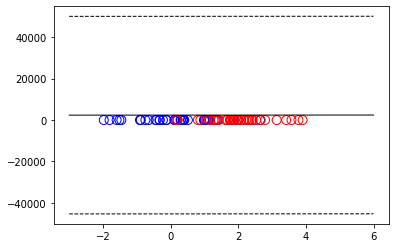

In [41]:
nonseparable = np.loadtxt('nonseparable.txt')
data = nonseparable[:,:3]
X, Xtest, t, ttest = train_test_split(data[:,:2], data[:,2], test_size=0.2, random_state=42)
sv, score = lmc(X,t, Xtest)
print("The Support Vector indices are", sv)
print("The displacements of the test data points from the optimal hyperplane:", score)



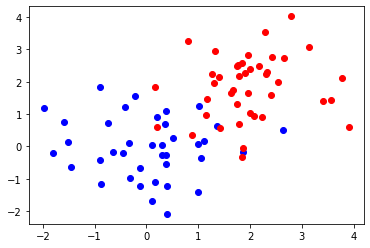

In [16]:
plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'ro')

The problem given to the cvxopt solver is not solvable as no linear line can be drawn to seperate all red spots and blue spots. This is because this constraint is not solvable when the data is not linearly separable: $t_i(\mathbf{W}^T \mathbf{X}_i + b) \ge 1$ for all data points $i$ in a dataset of size $N$. 
Therefore a solution cannot be found with cvxopt without further manipulation of the data or solver.

Observing what is happening a hyperplane is being predicted but with rather bad results usually classifying everything as 1 class.

# Part 4. Soft, large margin classifier

Of course, most interesting data sets are not linearly separable.  Using your `lmc` function as a basis, write a new function:

    sv, score = lsvm(X, t, C, Xtest)

that implements a soft large margin classifier. The additional parameter `C` should specify the relative weight given to the emperical error versus the regularisation term.
<div style="text-align: right"><b>[10 marks]</b></div>

In [17]:
def lsvm(X, t, C, Xtest):
    
    # PROBLEM FORMULATION
    N = len(X[:,0])
    P = matrix(np.outer(t,t)*np.inner(X,X)) #letting alpha be x in the cvxopt formula and formulating the minimisation
    q = matrix(-1*np.ones(N))
    G = matrix(np.vstack(( np.diag(-1*np.ones(N)) , np.diag(np.ones(N)) ))) #accounts for C >= a >= 0 (problem extended)
    h = matrix(np.hstack((np.zeros(N),C*np.ones(N)))) 
    A = matrix(t, (1,N)) #sum of all a*t = 0
    b = matrix(0.0)

    solution = solvers.qp(P, q, G, h, A, b)
    alpha = solution['x']
    alphav = np.array(alpha)
    
    r = np.where((alphav > 1e-5)) #indices of support vectors
    sva = alphav[r[0]] #alphas of support vectors
    sv = X[r[0],:]  #support vector coordinates
    tsv = t[r[0]]   #support vector targets
    numsvs = len(sv)
    W = np.zeros((1,len(X[0,:])))
    Y = np.zeros((1,len(Xtest[:,0])))
    
    # FINDING W
    for i in np.arange(numsvs):
        W = W + sva[i]*tsv[i]*sv[i,:]
    
    # FINDING B(BIAS)
    Bias = 0
    for i in np.arange(numsvs):
        Bias = Bias + tsv[i] - sum(sva[i]*tsv[i]*np.inner(sv[i],sv))
        
    Bias = Bias/numsvs
    
    # FINDING SCORES(Distance from Hyperplane) OF TEST DATA
    for j in np.arange(len(Xtest[:,0])):
        Y[:,j] = Bias
        for i in np.arange(numsvs):
            Y[:,j] = Y[:,j] + sum(sva[i]*tsv[i]*np.inner(sv[i],Xtest[j]))
    
    # PLOTTING COMMANDS
    Xdel = np.delete(X ,r[0],axis = 0)
    tdel = np.delete(t ,r[0],axis = 0)
    plt.plot(Xdel[tdel==-1,0], Xdel[tdel==-1,1], 'bo')
    plt.plot(Xdel[tdel==1,0], Xdel[tdel==1,1], 'ro')
    plt.scatter(sv[tsv==-1,0], sv[tsv==-1,1], s=80, facecolors='none', edgecolors='b')
    plt.scatter(sv[tsv==1,0], sv[tsv==1,1], s=80, facecolors='none', edgecolors='r')
    W = W[0]
    plt.xlim((-3,6))
    plt.ylim((-3,6))
    
    # PLOTS THE HYPERPLANE AND ITS MARGINS
    def meq(w1,w2,x,y,b):
        return w1*x + w2*y + b
    
    xrange = np.linspace(-3, 6, 50)
    yrange = np.linspace(-3, 6, 50)
    xgrid, ygrid = np.meshgrid(xrange,yrange)
    plt.contour(xgrid, ygrid, meq(W[0],W[1],xgrid,ygrid,Bias), 10, linewidths = 1)
    plt.colorbar()
    plt.contour(xgrid, ygrid, meq(W[0],W[1],xgrid,ygrid,Bias), [0.0], colors='k', linewidths=1)
    plt.contour(xgrid, ygrid, meq(W[0],W[1],xgrid,ygrid,Bias)+1, [0.0], colors='k', linewidths=1, linestyles = 'dashed')
    plt.contour(xgrid, ygrid, meq(W[0],W[1],xgrid,ygrid,Bias)-1, [0.0], colors='k', linewidths=1, linestyles = 'dashed')
    
    return r[0], Y, W #I have outputted W to see visually how the width of the margin varies with C



We've now added an extra constraint/modified our previous one allowing some variable to be on the wrong side of the hyperplane or within the margins and using them as support vectors to optimise the positioning of our hyperplane.

Test your function on the following simple data set.   These data are drawn from two isotropic Gaussian distributions centred at $(0, 0)$ and $(2, 2)$, so the optimal separating hyperplane, in the limit of a large amount of data, is the perpendicular bisector of the line joining the centres.  As before, plot the separating hyperplane and the support vectors and make a contour plot of the score across the domain.
<div style="text-align: right"><b>[5 marks]</b></div>

How does the width of the margin vary with `C`?  Explain why.
<div style="text-align: right"><b>[5 marks]</b></div>

     pcost       dcost       gap    pres   dres
 0: -1.2901e+02 -5.3928e+03  1e+04  7e-01  1e-14
 1: -8.4966e+01 -1.3459e+03  2e+03  4e-02  2e-14
 2: -1.0935e+02 -3.0796e+02  2e+02  4e-03  2e-14
 3: -1.3752e+02 -2.3038e+02  1e+02  1e-03  2e-14
 4: -1.4895e+02 -1.9303e+02  4e+01  5e-04  2e-14
 5: -1.6151e+02 -1.6999e+02  9e+00  3e-05  2e-14
 6: -1.6218e+02 -1.6787e+02  6e+00  1e-05  2e-14
 7: -1.6421e+02 -1.6502e+02  8e-01  1e-06  3e-14
 8: -1.6456e+02 -1.6457e+02  2e-02  2e-08  3e-14
 9: -1.6456e+02 -1.6456e+02  2e-04  2e-10  2e-14
Optimal solution found.
The Support Vector indices are [ 3  5 15 18 22 23 28 31 42 51 53 57 58 62 69 70 75 78 79]
The displacements of the test data points from the optimal hyperplane: [[ 4.01901646  2.00090437  2.95963383 -4.89973115 -1.52483705 -6.22588347
  -3.13935604  1.71753996 -2.5572988  -3.39374765 -5.03843993  0.94794359
   3.34117821 -3.57425339  4.73666042 -4.96013372  3.38638572  3.19214002
  -1.19909429 -2.50838238]]


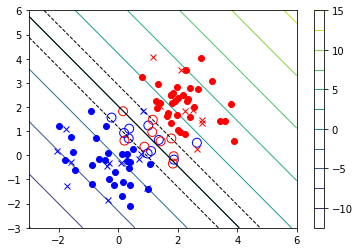

In [18]:
nonseparable = np.loadtxt('nonseparable.txt')
data = nonseparable[:,:3]
X, Xtest, t, ttest = train_test_split(data[:,:2], data[:,2], test_size=0.2, random_state=42)
sv, score, W = lsvm(X,t,10,Xtest)
print("The Support Vector indices are", sv)
print("The displacements of the test data points from the optimal hyperplane:", score)
plt.plot(Xtest[ttest==-1,0], Xtest[ttest==-1,1], 'bx') #test data plotted in correct colour to see misclassifications
plt.plot(Xtest[ttest==1,0], Xtest[ttest==1,1], 'rx')


- hollow blue/red circles = Support vectors
- blue/red circles = Training data
- blue/red crosses = Test data
- black line = optimal hyperplane
- dashed black line = margin edges
- coloured contours to show the scores at each level away from the optimal hyperplane

Introducing a new constraint where $a_n \le C$ we now see these outliers that were causing the data to not be linear separable be converted to support vectors in order to find the optimal hyperplane. I observe 1 (possibly more) misclassification in the test data where a blue cross is above the hyperplane which would be classified as red.

In [19]:
%%capture
Cvals = np.logspace(-3, 3, 7)
W = []
for i in np.arange(len(Cvals)):
    sv,score,w = lsvm(X,t,Cvals[i],Xtest)
    W.append(2/np.linalg.norm(w))

Text(0, 0.5, '2/||W|| ')

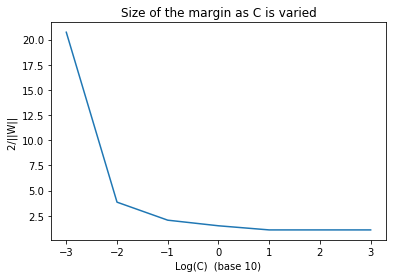

In [20]:
logcvals = np.arange(7) - 3
plt.plot(logcvals,W)
plt.title('Size of the margin as C is varied') 
plt.xlabel('Log(C)  (base 10)')
plt.ylabel('2/||W|| ')

As $C$ get smaller the width of the margin gets larger because of the condition $0 \le a_n\le C$ so that when $C$ gets smaller $a_n$ will get smaller which causes $||W||$ to get smaller thereby increasing the margin width which is equal to $2/||W||$. This can be seen above where the size of the margin decreases sharply as $Log(C)$ is increased from $-3$.

When the C condition is added the minimizer is trying to effectively do 2 things: Find a hyperplane with the largest minimum margin and define a hyperplane that separates as much of the data as possible. When a higher C is chosen we give more priority to separating as much of the data into the right classes as possible which in effect will cause us to have a smaller margin. Logically the inverse occurs for a lower C where we are trying to find a hyperplane with the largest minimum margin.

# Part 5. Nonlinear SVM

Finally, using your `lsvm` code as a basis, write a new function to implement a fully nonlinear SVM with a user-specfied kernel function.   Your code should have the signature:

    sv, score = svm(X, t, C, kernel, Xtest)
    
where the `X`, `t`, `C` and `Xtest` are as before and `kernel` is a function that evaluates a kernel and can be called by your svm to evaluate the similarity of any pair of vectors:

    ip = kernel(x, y)     # inner product in some high-dimensional space

For example, the following cell implements an RBF kernel function

<div style="text-align: right"><b>[10 marks]</b></div>

In [42]:
def rbf(x, y, gamma):
    """RBF kernel with precision gamma."""
    d = x-y
    return np.exp(-gamma*np.dot(d, d))

def polynomial(x ,y ,r):
    """polynomial kernel with parameter r"""
    return (1+np.dot(x,y))**r

def linear(x, y):
    """linear kernel"""
    return np.dot(x,y)

def svm(X, t, C, para, kernel, Xtest, plotter):
    
    #REDEFINED KERNEL WITH PARAMETER(FOR EASY CROSS VALIDATION)
    if kernel != linear:
        def nkernel(x,y):
            return kernel(x,y,para)
    else:
        def nkernel(x,y):
            return kernel(x,y) #para is disregarded if using a linear kernel
        
    # PROBLEM FORMULATION
    N = len(X[:,0])
    inner_p = np.zeros((N,N))
    for i in np.arange(N):
        for j in np.arange(N): #sets up the inner product such that the kernel can be run on the individual elements
            inner_p[i,j] = nkernel(X[i],X[j]) 
    
    P = matrix(np.outer(t,t)*inner_p)  #letting alpha be x in the cvxopt formula and formulating the minimisation
    q = matrix(-1*np.ones(N))
    G = matrix(np.vstack(( np.diag(-1*np.ones(N)) , np.diag(np.ones(N)) ))) #accounts for C >= a >= 0
    h = matrix(np.hstack((np.zeros(N),C*np.ones(N))))
    A = matrix(t, (1,N)) #sum of all a*t = 0
    b = matrix(0.0)

    solution = solvers.qp(P, q, G, h, A, b)
    alpha = solution['x']
    alphav = np.array(alpha)
    
    r = np.where((alphav > 1e-5)) #indices of support vectors
    sva = alphav[r[0]] #alphas of support vectors
    sv = X[r[0],:]  #support vector coordinates
    tsv = t[r[0]]   #support vector targets
    numsvs = len(sv)
    W = np.zeros((1,len(X[0,:])))
    Y = np.zeros((1,len(Xtest[:,0])))
    
    # FINDING W(used in plotting)
    for i in np.arange(numsvs):
        W = W + sva[i]*tsv[i]*sv[i,:]
    
    # FINDING B(BIAS)
    Bias = 0
    if (kernel == linear) | (kernel == polynomial): 
        for i in np.arange(numsvs):
            Bias = Bias + tsv[i] - sum(sva[i]*tsv[i]*inner_p[r[0][i],r[0]])
        
        Bias = Bias/numsvs
    
    # FINDING SCORES(Distance from Hyperplane) OF TEST DATA
    for j in np.arange(len(Xtest[:,0])):
        Y[:,j] = Bias
        for i in np.arange(numsvs):
            Y[:,j] = Y[:,j] + sum(sva[i]*tsv[i]*nkernel(sv[i],Xtest[j]))
    
    
    # PLOTTING COMMANDS
    if plotter == True:
        Xdel = np.delete(X ,r[0],axis = 0)
        tdel = np.delete(t ,r[0],axis = 0)
        plt.plot(Xdel[tdel==-1,0], Xdel[tdel==-1,1], 'bo')
        plt.plot(Xdel[tdel==1,0], Xdel[tdel==1,1], 'ro')
        plt.scatter(sv[tsv==-1,0], sv[tsv==-1,1], s=80, facecolors='none', edgecolors='b')
        plt.scatter(sv[tsv==1,0], sv[tsv==1,1], s=80, facecolors='none', edgecolors='r')
        W = W[0]
        plt.xlim((-3,6))
        plt.ylim((-3,6))

        xrange = np.linspace(-3, 6, 50)
        yrange = np.linspace(-3, 6, 50)
        xgrid, ygrid = np.meshgrid(xrange,yrange)

        if kernel == linear:
            def meq(w1,w2,x,y,b): #slightly faster using this if statement for linear
                return w1*x + w2*y + b
            plt.contour(xgrid, ygrid, meq(W[0],W[1],xgrid,ygrid,Bias), [0.0], colors='k', linewidths=1)
            plt.contour(xgrid, ygrid, meq(W[0],W[1],xgrid,ygrid,Bias)+1, [0.0], colors='k', linewidths=1, linestyles = 'dashed')
            plt.contour(xgrid, ygrid, meq(W[0],W[1],xgrid,ygrid,Bias)-1, [0.0], colors='k', linewidths=1, linestyles = 'dashed')
        else:
            xycoords = np.vstack([xgrid.ravel(), ygrid.ravel()]).T
            Yg = np.zeros((len(xycoords[:,0])))
            for j in np.arange(len(xycoords[:,0])):
                Yg[j] = Bias
                for i in np.arange(numsvs):
                    Yg[j] = Yg[j] + sva[i]*tsv[i]*nkernel(sv[i],xycoords[j,:]) 

            Z = Yg.reshape(xgrid.shape)
            plt.contour(xgrid, ygrid, Z, [0.0], colors='k', linewidths=1)
            plt.contour(xgrid, ygrid, Z+1, [0.0], colors='b', linewidths=1, linestyles = 'dashed')
            plt.contour(xgrid, ygrid, Z-1, [0.0], colors='r', linewidths=1, linestyles = 'dashed')
    
    return r[0], Y, alphav, Bias

Test your code on the non-separable data above using a linear kernel, the RBF kernel and the polynomial kernel.  You will need to use cross-validation to choose the best parameters and it is fine to use the `scikit` cross validation and grid search machinery rather than writing your own.

<div style="text-align: right"><b>[5 marks]</b></div>

In [43]:
%%capture
# suppress output as only interested in scores 
# takes maximum 30 seconds
from sklearn.model_selection import KFold
f = 5
kf = KFold(n_splits=f, shuffle=True, random_state = 42)
nonseparable = np.loadtxt('nonseparable.txt')
data = nonseparable[:,:3]
X, Xtest, t, ttest = train_test_split(data[:,:2], data[:,2], test_size=0.2)


Cvals = np.logspace(-2, 4, 7)
linvalscore = np.zeros((1,len(Cvals)))
for i in np.arange(len(Cvals)):
    cor = 0
    for train, validation in kf.split(X):
        sv, score, alpha, Bias = svm(X[train],t[train],Cvals[i],0,linear,X[validation],False)
        cl = np.sign(score)[0]
        cor = cor + np.sum(cl == t[validation])/len(t[validation]) #calculates score per fold and adds to total
    
    linvalscore[:,i] = cor/f # divides total score by number of folds to get the validation score

rl = np.where(linvalscore[0,:] == np.amax(linvalscore[0,:]))
checkl = rl[0]



rvals = np.arange(5)+1
Cvals = np.logspace(-2, 4, 7)
polvalscore = np.zeros((len(rvals),len(Cvals)))
for j in np.arange(len(rvals)):
    for i in np.arange(len(Cvals)):
        cor = 0
        for train, validation in kf.split(X):
            sv, score, alpha, Bias = svm(X[train],t[train],Cvals[i],rvals[j],polynomial,X[validation],False)
            cl = np.sign(score)[0]
            cor = cor + np.sum(cl == t[validation])/len(t[validation]) #calculates score per fold and adds to total
    
        polvalscore[j,i] = cor/f # divides total score by number of folds to get the validation score


rp = np.where(polvalscore == np.amax(polvalscore))
checkp = rp[0]


gvals = np.logspace(-2, 2, 5)
Cvals = np.logspace(-2, 4, 7)
rbfvalscore = np.zeros((len(gvals),len(Cvals)))
for j in np.arange(len(gvals)):
    for i in np.arange(len(Cvals)):
        cor = 0
        for train, validation in kf.split(X):
            sv, score, alpha, Bias = svm(X[train],t[train],Cvals[i],gvals[j],rbf,X[validation],False)
            cl = np.sign(score)[0]
            cor = cor + np.sum(cl == t[validation])/len(t[validation]) #calculates score per fold and adds to total
    
        rbfvalscore[j,i] = cor/f # divides total score by number of folds to get the validation score

rr = np.where(rbfvalscore == np.amax(rbfvalscore))


bestlinC = Cvals[checkl[0]]
bestpolyC = Cvals[rp[1][0]]
bestrbfC = Cvals[rr[1][0]]
bestpolyr = rvals[rp[0][0]]
bestrbfgamma = gvals[rr[0][0]]

In [44]:
print("Optimal parameters for the linear kernel: C:", bestlinC, " with best score:", linvalscore[0,checkl[0]])
print("Optimal parameters for the polynomial kernel: C:", bestpolyC," r:",bestpolyr," with best score:", polvalscore[rp[0][0],rp[1][0]])
print("Optimal parameters for the rbf kernel: C:", bestrbfC," gamma:",bestrbfgamma," with best score:", rbfvalscore[rr[0][0],rr[1][0]])



Optimal parameters for the linear kernel: C: 0.01  with best score: 0.9125
Optimal parameters for the polynomial kernel: C: 0.1  r: 2  with best score: 0.925
Optimal parameters for the rbf kernel: C: 10.0  gamma: 0.01  with best score: 0.925


     pcost       dcost       gap    pres   dres
 0: -1.2784e+01 -1.6238e+00  5e+02  2e+01  2e-15
 1: -4.2558e-01 -1.6161e+00  6e+00  2e-01  1e-15
 2: -3.1901e-01 -1.0782e+00  8e-01  3e-17  4e-16
 3: -3.6676e-01 -4.4742e-01  8e-02  2e-17  6e-16
 4: -4.0722e-01 -4.1915e-01  1e-02  2e-17  4e-16
 5: -4.1364e-01 -4.1582e-01  2e-03  2e-17  3e-16
 6: -4.1485e-01 -4.1511e-01  3e-04  2e-17  3e-16
 7: -4.1498e-01 -4.1499e-01  4e-06  3e-17  3e-16
 8: -4.1498e-01 -4.1498e-01  4e-08  2e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3674e+01 -1.4636e+01  5e+02  2e+01  2e-14
 1: -2.4647e+00 -1.3496e+01  3e+01  9e-01  2e-14
 2: -1.7133e+00 -6.8443e+00  8e+00  2e-01  5e-15
 3: -1.5236e+00 -2.4942e+00  1e+00  2e-02  3e-15
 4: -1.6197e+00 -1.8797e+00  3e-01  5e-03  2e-15
 5: -1.6675e+00 -1.7470e+00  9e-02  1e-03  1e-15
 6: -1.6905e+00 -1.7022e+00  1e-02  1e-04  2e-15
 7: -1.6926e+00 -1.6977e+00  5e-03  3e-05  2e-15
 8: -1.6948e+00 -1.6949e+00  8e-05  4e-07  2e-1

Text(0.5, 1.0, 'SVM with RBF Kernel')

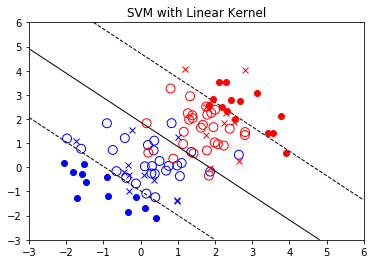

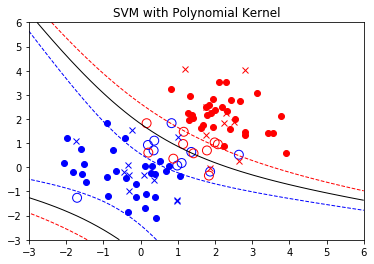

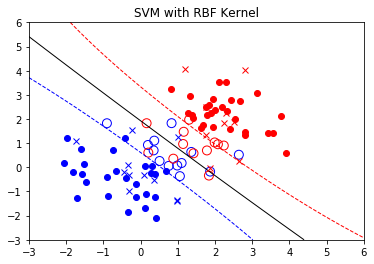

In [45]:
plt.figure()
svm(X,t,bestlinC,0,linear,Xtest,True)
plt.plot(Xtest[ttest==-1,0], Xtest[ttest==-1,1], 'bx')
plt.plot(Xtest[ttest==1,0], Xtest[ttest==1,1], 'rx')
plt.title("SVM with Linear Kernel")
plt.figure()
svm(X,t,bestpolyC,bestpolyr,polynomial,Xtest,True)
plt.plot(Xtest[ttest==-1,0], Xtest[ttest==-1,1], 'bx')
plt.plot(Xtest[ttest==1,0], Xtest[ttest==1,1], 'rx')
plt.title("SVM with Polynomial Kernel")
plt.figure()
svm(X,t,bestrbfC,bestrbfgamma,rbf,Xtest,True)
plt.plot(Xtest[ttest==-1,0], Xtest[ttest==-1,1], 'bx')
plt.plot(Xtest[ttest==1,0], Xtest[ttest==1,1], 'rx')
plt.title("SVM with RBF Kernel")

Remarks : 
- A lot of the time each svm for each kernel will take the most linear case of parameters as the data is close to being linearly separable based on how the data has split into training and test sets. 
- If C is 0.001 the margins go off the plot and so we'll only see the hyperplane. I have removed this case.
- If gamma is small and C is small sometimes the margins will not be plot on the rbf case
- The polynomial kernel performs rather badly without a bias and so one has been added

When the the most linear case is chosen we see the best scores be the same. We also might see the same scores for other parameters on the grid we are searching. 

Upon running this multiple times we find RBF tend to find the best score followed by polynomial and then linear.

## Regularisation

Using the non-separable data, plot the regularisation term $\|\mathbf{w}\|^2$ (you may need to modify your function above to return the $\alpha$ values) and the empirical error for a range of $C$ and so visualise the trade-off between regularisation and empirical error. Use an appropriate logarithmically spaced range for $C$.

<div style="text-align: right"><b>[10 marks]</b></div>

In [25]:
def reg(a,x,t,ind):
    W = np.zeros((1,len(x[0,:])))
    for i in ind:
        W = W + a[i]*t[i]*x[i,:]
        
    return np.sum(np.square(W)), W

def emperror(a,x,t,W,B,ind,kernel,para):
    if kernel != linear:
        def nkernel(x,y):
            return kernel(x,y,para)
    else:
        def nkernel(x,y):
            return kernel(x,y) #para is disregarded if using a linear kernel
    
    E = 0
    Y = 0 
    for j in np.arange(len(t)):
        Y = Bias
        for i in ind:
            Y = Y + a[i]*t[i]*nkernel(X[i],X[j]) #finds score
    
        check = 1 - t[j]*Y #finds empirical error
        if check > 0:
            E = E + check  #if its larger than zero(point is outside the margin)
    return E

In [26]:
%%capture
nonseparable = np.loadtxt('nonseparable.txt')
data = nonseparable[:,:3]
X, Xtest, t, ttest = train_test_split(data[:,:2], data[:,2], test_size=0.2)
Cvals = np.logspace(-3, 3, 7)
l = len(Cvals)
linearW = np.zeros((1,l))
linearE = np.zeros((1,l))
polyW = np.zeros((1,l))
polyE = np.zeros((1,l))
rbfW = np.zeros((1,l))
rbfE = np.zeros((1,l))
for i in np.arange(len(Cvals)):
    sv, score, alpha, Bias = svm(X,t,Cvals[i],0,linear,Xtest,False)
    linearW[:,i] , W = reg(alpha,X,t,sv)
    linearE[:,i] = emperror(alpha,X,t,W,Bias,sv,linear,0)
    
    sv, score, alpha, Bias = svm(X,t,Cvals[i],bestpolyr,polynomial,Xtest,False) #r = 1 is same as Linear case
    polyW[:,i] , W = reg(alpha,X,t,sv)
    polyE[:,i] = emperror(alpha,X,t,W,Bias,sv,polynomial,bestpolyr)

    sv, score, alpha, Bias = svm(X,t,Cvals[i],bestrbfgamma,rbf,Xtest,False)
    rbfW[:,i] , W = reg(alpha,X,t,sv)
    rbfE[:,i] = emperror(alpha,X,t,W,Bias,sv,rbf,bestrbfgamma)
    


Text(0, 0.5, 'Regularisation term ||W||^2')

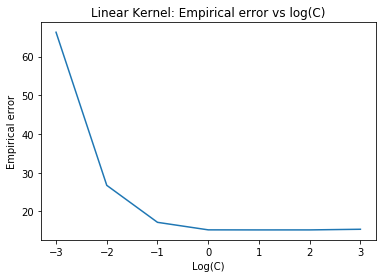

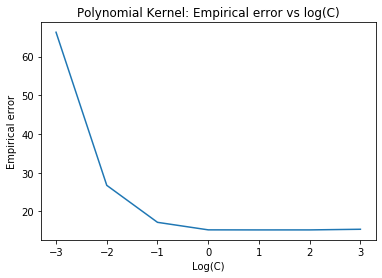

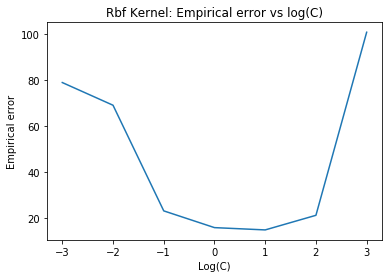

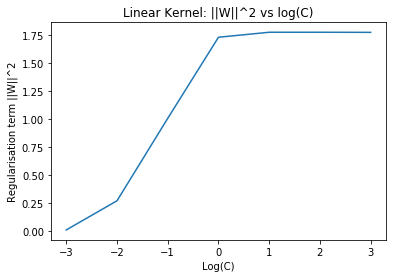

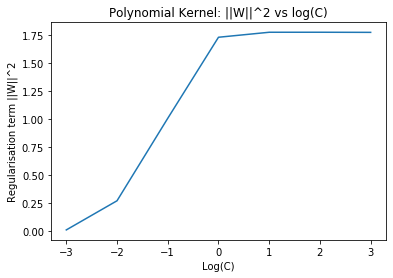

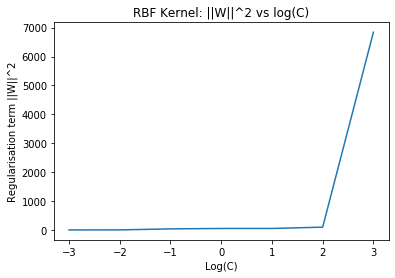

In [27]:
logcvals = np.arange(7)-3
plt.figure()
plt.plot(logcvals,linearE[0,:])
plt.title('Linear Kernel: Empirical error vs log(C)') 
plt.xlabel('Log(C)')
plt.ylabel('Empirical error')

plt.figure()
plt.plot(logcvals,polyE[0,:])
plt.title('Polynomial Kernel: Empirical error vs log(C)') 
plt.xlabel('Log(C)')
plt.ylabel('Empirical error')

plt.figure()
plt.plot(logcvals,rbfE[0,:])
plt.title('Rbf Kernel: Empirical error vs log(C)') 
plt.xlabel('Log(C)')
plt.ylabel('Empirical error')

plt.figure()
plt.plot(logcvals,linearW[0,:])
plt.title('Linear Kernel: ||W||^2 vs log(C)') 
plt.xlabel('Log(C)')
plt.ylabel('Regularisation term ||W||^2')

plt.figure()
plt.plot(logcvals,polyW[0,:])
plt.title('Polynomial Kernel: ||W||^2 vs log(C)') 
plt.xlabel('Log(C)')
plt.ylabel('Regularisation term ||W||^2')

plt.figure()
plt.plot(logcvals,rbfW[0,:])
plt.title('RBF Kernel: ||W||^2 vs log(C)') 
plt.xlabel('Log(C)')
plt.ylabel('Regularisation term ||W||^2')

In our empirical error vs $Log(C)$ graphs we observe decreases in empirical error as our value of $C$ is increased for all kernels. In our Linear SVM we observe the empirical error plateau at a small value. The Polynomial SVM does something similar. Curiously for the rbf SVM we see a small plateau at roughly 80(sometimes) followed by a decrease and then the empirical error goes back up for $C = 10^2$ and $10^3$ spiking at $C = 10^3$.

In our Regularisation term vs $Log(C)$ graphs we generally observe increases in regularisation $||W||^2$ as our value of $C$ is increased. In our Linear and polynomial SVMs we observe an increase in regularisation to $10^0$ followed by a plateau. In our rbf SVM we see a spike in regularisation at $10^2$. Note that the axis are very different for rbf vs polynomial and linear where the change in rbf is significant. This is because RBF has used more support vectors on average than polynomial and linear.

Note these graphs may be subject to change based on the best parameters chosen by the cross validation which is inconsistent.